<a href="https://colab.research.google.com/github/scudilio/Churn_model/blob/master/Parte_II_Churn_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**PARTE II: Como utilizar modelos de Machine Learning para reduzir o Churn**

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para transformar em informações e as informações para tomar decisões. 


"*Seus clientes mais insatisfeitos são sua maior fonte de **aprendizado** (Bill Gates).*"

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn. 

Mas quais são as características que leva um cliente a dar o Churn? 

Na parte I, desse tutorial, entendemos o problema de Churn e estabelecemos o objetivo, identificar o perfil e prever os clientes em risco de Churn.

Agora nessa parte II daremos continuidade a análise e para isso utilizaremos um conjunto de dados de uma agência bancária.

Recordando, para esse projeto de Data Science seguiremos essas etapas

1.   Entedimento do Problema
2.   Obtenção dos dados
3.   Análise Exploratória dos dados
4.   Pré-processamento
5.   Modelos de Machine Learning
6.   Avaliação do modelo 

Na Parte I, dessa série de artigos, abordamos o problema de Churn e estabelecemos os objetivos. 

Se você tem dúvidas sobre o que é o Churn, corre lá para ler esse artigo. Ele te ajudará a entender a importãncia e o porque estamos fazendo essas análise.

**[PARTE I: Como utilizar modelos de Machine Learning para reduzir o Churn]**

Agora na Parte II, dessa série de artigos, vamos executar a etapa 2 e 3, ou seja, obter, explorar e visualizar os dados.

## **2. Obtenção do conjunto de dados**

 Os dados utilizados aqui foram extraídos do Kaggle e são dados de clientes de uma agência bancária. Utilizaremos o Google Colab, o python na nuvem, para fazer as análises.

###**Permitindo o acesso do Google Colab ao Drive**

Para importar os dados, que estão salvo no Google Drive, é necessário permitir o acesso do Colab. Para isso precisamos,
1. rodar os comandos abaixo, 
2. clicar na URL que irá aparecer, 
3. permitir o acesso ao drive  
4. copiar e colar o código de acesso no Colab. 

In [4]:
#Acesso ao drive
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###**Importando os dados**

Para fazer as análise é necessário dos dados, assim precisamos importar a biblioteca pandas para processar os dados.

In [0]:
import pandas as pd

A importação dos dados é feita utilizando os comandos a seguir

In [5]:
##IMPORTANDO ARQUIVOS
#escrevendo em um arquivo csv
df= pd.read_csv('/content/drive/My Drive/kaggle_datasets/Churn_Modelling.csv')
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


No conjunto de dados temos as seguinte variáveis:

* CustomerId: identificação do cliente;
* Surname: sobrenome do cliente;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade. 
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).


##**3. Análise Exploratória dos dados - Visão geral do conjunto de dados**

Nessa etapa, iremos 

* Identificar o tipo de cada variável (númerica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar o perfil dos clientes que deram Churn


##**A.Identificando as variáveis presentes no dataset**

Nessa etapa, o interesse é obter algumas informações sobre as variáveis, para isso utilizamos o método .DataFrame.info() :

In [6]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observamos que temos 14 variáveis e 10000 observações no dataset, além disso, temos variáveis do tipo inteiro, reais e objeto.

Os dados se enquadram em duas categorias:

* Variáveis categóricas: sexo, país, cartão de crédito, clientes ativos e saída do cliente.
*Variáveis numéricas: escore do cliente, idade, tenure, balance, número de produtos, salário estimado.

##**B. Identificando a variável alvo**

Nosso interesse é identificar o perfil de clientes que cancelaram o serviço com agência bancária e tentar prever clientes em risco de Churn. Assim a variável 'Exited' é a variável adequada para alcançar os objetivos propostos.

##**C. Análise exploratória dos dados**


Utilizamos o comando 'describe()' para obter algumas medidas descritivas das variáveis como, média, mediana (quartil 50%), máxima, mínimo, desvio padrão, quartis e a contagem 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Os clientes, dessa agência bancária, têm em média 39 anos, sendo a idade mínima de 18 anos e máxima de 92 anos. A pontuação de crédito fica em torno de 650 pontos e o índice médio de estabilidade de emprego é 5. 

Os clientes têm em média \$76.000 mil doláres na conta e possuem em média 1,5 produtos do banco. O salário médio anual estimado é de \$100.000 mil doláres, 70% dos clientes possuem cartão de crédito e apenas 51% são ativos no banco, ou seja, fazem movimentação bancária constantemente. 

Analisando a variável de Churn ('Exited'), observa-se que 20% dos clientes romperam seu contrato com a agência bancária. 




In [0]:
#quantidade de linhas e colunas do dataframe
df.shape

(10000, 14)

###**Distribuição das variáveis**

Plotar a distribuição de cada variável, da uma visão geral da mesma e possíveis outilers (valores discrepantes).

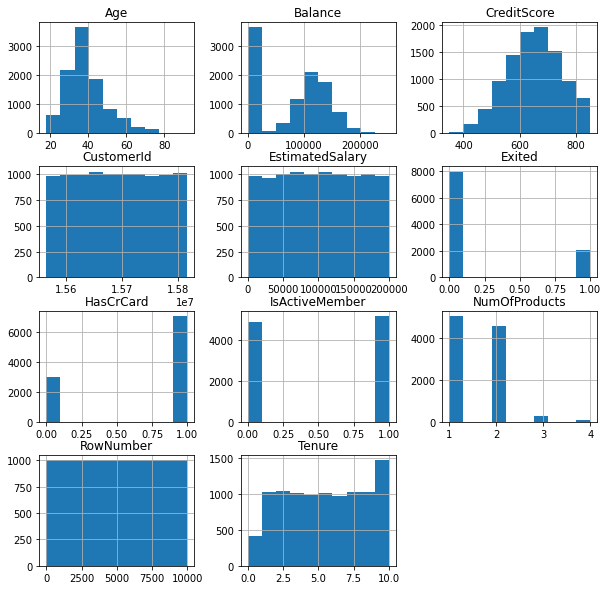

In [0]:
df.hist(figsize=(10,10));


O histograma da variável Idade mostra uma distribuição assimétrica a esquerda, ou seja, a maioria dos clientes têm entre 30 a 45 anos e poucos clientes têm idade superior a 60 anos. Já, o histograma da variável Balance (saldo bancário), mostra uma inflação de clientes que têm pouco dinheiro na conta bancária, isso pode ser um indicativo que esses clientes possuem outra conta bancária. 

O histograma da variável Score do Cliente mostra uma leve assimetria a direita, indicando que os clientes têm um escore elevado. E o histograma da variável Salário Estimado mostra que os valores estão uniformemente distribuídos. Ou seja, temos frequência parecidas entre os salários do clientes e existem clientes com salários baixo, médio e alto. 

A distribuição da variável Tenure (índice de estabilidade de emprego), mostra uma alta frequência no índice 10, ou seja, muitos clientes têm uma estabilidade alta. E uma baixa frequência no índice 0, de baixa estabilidade.

A distribuição da variável Número de Produtos indica que a maioria dos clientes têm 1 ou 2 produtos e poucos clientes têm 3 ou mais produtos. Analisando o gráfico da variável Cartão de Crédito, observa-se que a maioria dos clientes possuem cartão de crédito. 

O gráfico de frequência da variável Membro Ativo, mostra que temos um equilíbrio entre os clientes que movimentam a conta e os clientes que não possuem esse hábito de movimentar a conta.

E para finalizar, a variável Exited apresenta que poucos clientes cancelaram sua conta bancária. 

Viu quanta informação conseguimos extrair da distribuição de frequência das variáveis.


## **D.Visualização de Dados - Qual o perfil de clientes que cancelaram o contrato (Churn)?**


Nessa etapa faremos a análise visual dos dados e mostraremos como as técnicas gráficas são úteis para identificar as características dos clientes que cancelaram o serviço.

Para construir os gráficos no Python, precisamos importar algumas *bibliotecas*.

In [8]:
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt#visualização de dados;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para facilitar a configuração das cores dos gráficos, irei definir uma paleta de cores. Você pode utilizar as cores default dos gráfico, mas eu prefiro definir algumas cores que são mais agradáveis, ao meu ver.

In [0]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#238E68'




In [0]:
# porcentagem de clientes que sairam do banco
df['Exited'].sum()/df['Exited'].count()

0.2037

Observe que 20% dos clientes dessa agência bancária abandonaram o serviço. Vale ressaltar que existe um desbalanceamento em relação a variável de interesse, Exited. E ignorar essa desproporção, entre as classes, pode impactar os resultados de previsão do modelo, que será assunto para o próximo artigo.



###**Variáveis Categóricas**

 Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

* **Variável Sexo**

In [0]:
#renomeando as categorias
df['Gender']=df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])

In [12]:
df_plot = df.groupby ('Gender'). Exited.mean (). reset_index () 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


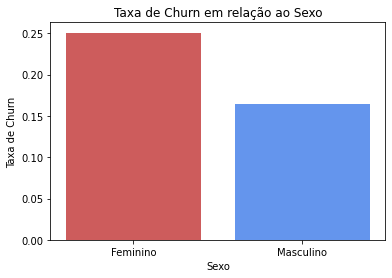

In [15]:
#Sexo em relação a variável churn
x =df_plot['Gender']
y=df_plot['Exited']
plt.bar(x,y,color=[myred,myblue]);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

Observa-se que as mulheres têm um risco maior de Churn do que os homens. 

* **Variável País**

In [0]:
df['Geography']=df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])


In [18]:
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


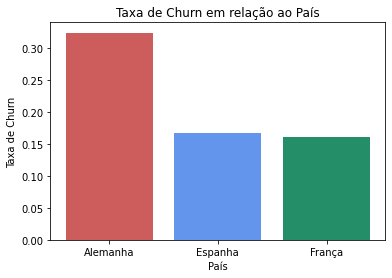

In [19]:
#País em relação a variável churn
x =df_plot['Geography']
y=df_plot['Exited']
plt.bar(x,y,color=[myred,myblue,mygreen]);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

Em relação a variável país, observa-se que a porcentagem de Churn na Alemanha é bastante elevada, onde 32% dos clientes encerraram a conta no banco. Espanha e França têm uma taxa de Churn parecidas em torno de 16%.

* **Variável Cartão de Crédito**

In [0]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])


In [21]:
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


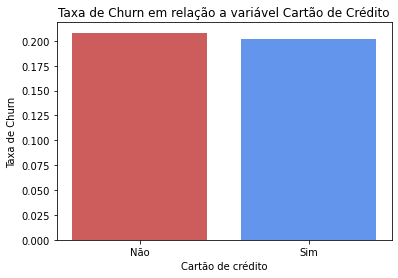

In [22]:
#Carão de crédito em relação a variável churn
x =df_plot['HasCrCard']
y=df_plot['Exited']
plt.bar(x,y,color=[myred,myblue]);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.

* **Variável Membro Ativo**


In [0]:
df['IsActiveMember']=df['IsActiveMember'].replace([0,1],['Não','Sim'])


In [24]:
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


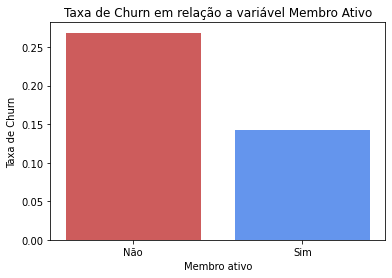

In [25]:
#Membro ativo em relação a variável churn
x =df_plot['IsActiveMember']
y=df_plot['Exited']
plt.bar(x,y,color=[myred,myblue]);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

O Churn entre os clientes que não são ativos é maior do que os clientes ativos, tendo uma diferença de aproximadamente 12%.

###**Variáveis numéricas**

Para as variáveis numéricas utilizaremos variáveis de barras para variáveis discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis.

Selecionamos, primeiramente, apenas as variáves numéricas.


In [26]:
df_cont=df[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
df_cont


,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


* **Matriz de Correlação**

Utilizaremos a função heatmap() para entender o relacionamento entre as variáveis numéricas.

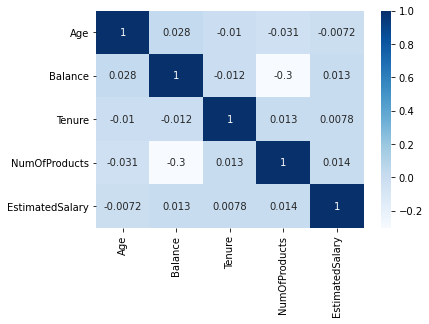

In [27]:
import seaborn as sns
sns.heatmap(df_cont.corr(),annot = True,
            cmap='Blues');

Analisando a correlação entre as variáveis, observa-se que temos baixas correlações. A maior correlação é entre as variáveis Número de Produtos e Saldo Bancário ('Balance') e temos uma correlação negativa de - 0,3 entre elas. Ou seja, quando menor o Número de Produtos maior o Saldo Bancário.

Primeiro plotamos os gráficos para as variáves quantitativas discretas, como, 'NumOfProducts' e 'Tenure'.

* **Variável Número de Produtos**

In [28]:
df_plot = df.groupby ('NumOfProducts').Exited.mean(). reset_index () 
df_plot


,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


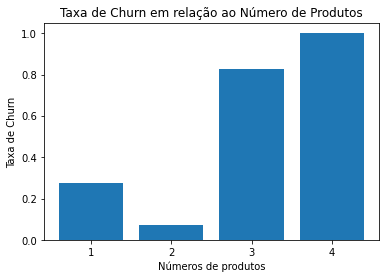

In [30]:
#Número de produtos em relação a variável churn
x =df_plot['NumOfProducts']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

Quanto maior o número de produtos maior a taxa de Churn. 

**Observação:**Para alterar o eixo do gráfico utilize a função plt.xticks

* **Variável Tenure**


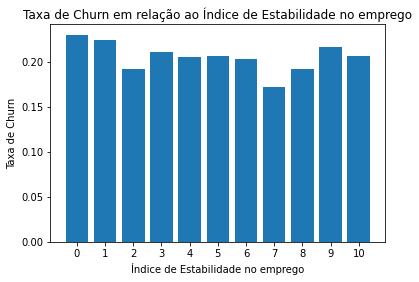

In [33]:
df_plot = df.groupby ('Tenure'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =df_plot['Tenure']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

O nível de estabilidade do emprego parace não influenciar a taxa de Churn. Porém, observa-se uma taxa de Churn um pouco mais elevada em clientes com índice de estabilidade 0 e 1.

* **Variável Saldo Bancário**

In [0]:
df['Exited']=df['Exited'].replace([0,1],['Não','Sim'])

Exited
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

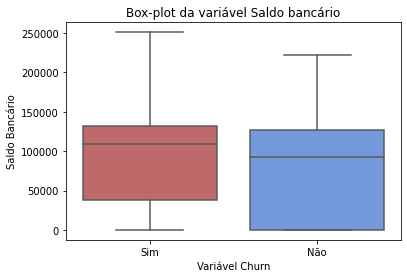

In [0]:
#box-plot salto bancario em relação ao Churn
cols= ["#CD5C5C", "#6495ED"]
sns.boxplot(x="Exited", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited'])['Balance'].mean()

Clientes que cancelaram os serviços bancários possui um saldo bancários maior do que aqueles clientes que não cancelaram o serviço. 

* **Variável Salário Estimado**

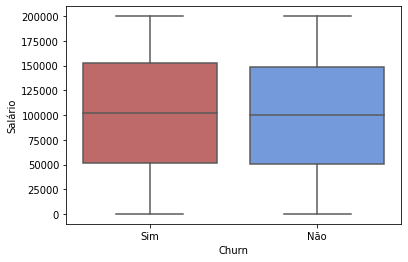

In [0]:
#box-plot salario pela variável churn

sns.boxplot(x="Exited", y="EstimatedSalary" , data=df,palette=cols);
df.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.

* **Variável Idade**

Text(0, 0.5, 'Taxa de Churn')

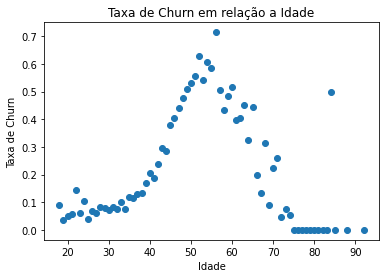

In [0]:
df_plot = df.groupby ('Age'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =df_plot['Age']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
Não    37.408389
Sim    44.837997
Name: Age, dtype: float64

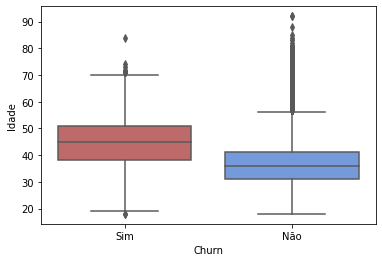

In [0]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

Observa-se, pelo boxplot, que clientes que cancelaram o serviço têm uma idade maior do que os clientes que não cancelaram o serviço. E ainda analisando o boxplot, observa-se a presença de outliers (pontos discrepantes).

Pelo gráfico de dispersão, entre a taxa de Churn e a idade, observa-se  que pessoas entre 50 e 60 anos tem uma alta taxa de Churn e clientes com mais de 75 anos tem risco quase zero de abandonar os serviços bancários.

* **Variável Escore de Crédito**

Exited
Não    651.853196
Sim    645.351497
Name: CreditScore, dtype: float64

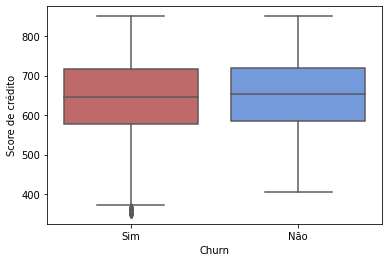

In [0]:
#box-plot score do cliente em relação ao churn

sns.boxplot(x="Exited", y="CreditScore" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
df.groupby(['Exited'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

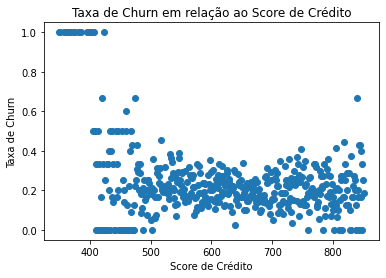

In [0]:
#Número de produtos em relação a variável churn
df_plot = df.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =df_plot['CreditScore']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

Analisando o boxplot, a variável pontuação de crédito no geral não possui grandes diferença em relação ao Churn de clientes. Porém, o boxplot dos clientes que cancelaram o serviço, possuí observações outliers na parte inferior e um limite inferior menor do que o boxplot dos clientes que não cancelaram o contrato. Indicando assim, que clientes que cancelaram o serviço possuem um score menor do que os clientes que não cancelaram o serviço.

Quando observamos o gráfico de dispersão da taxa de Churn em relação a pontuação de crédito, essa evidência fica mais clara, a taxa de Churn é maior entre os clientes com baixo escore de crédito. 

Ou seja, clientes com alto risco de serem inadimplentes também tem uma propensão maior de Churn.

# **Conclusão Parte II - Visualização de Dados**

Análisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço. 

Observa-se que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

Nessa parte II, analisamos o perfil dos clientes que deram o Churn. A análise exploratória dos dados se mostrou extremamente útil para identificar o perfil de clientes em evasão dos serviçoes.

Na parte III, dessa série de artigos, iremos implementar um modelo de Churn para prever os clientes com um alto risco de Churn.

Se ficou com alguma dúvida, deixe seu comentário e não se esqueça de rodar os códigos na sua máquina e começar a desenvolver na prática um projeto de Data Science.
